## 8. Feature Selection in the Diabetes Dataset
### <b>Task:</b> Use techniques like correlation analysis, mutual information, and recursive feature elimination (RFE) to select important features in the Diabetes dataset.

In [56]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Loading the dataset
diabetes_dataset = pd.read_csv('Datasets\\Diabetes.csv')

print(diabetes_dataset.shape, '\n')
diabetes_dataset.head()

(768, 9) 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3>Understanding the Existing features</h3>
<p><ul>
    <li><b>Pregnancies: </b>Number of times pregnant.</li>
    <li><b>Glucose: </b>Plasma glucose concentration a 2 hours in an oral glucose tolerance test.</li>
    <li><b>BloodPressure: </b>Diastolic blood pressure (mm Hg).</li>
    <li><b>SkinThickness: </b> Triceps skin fold thickness (mm).</li>
    <li><b>Insulin: </b>2-Hour serum insulin (mu U/ml).</li>
    <li><b>BMI: </b>Body mass index (weight in kg/(height in m)^2).</li>
    <li><b>DiabetesPedigreeFunction: </b>Diabetes pedigree function.</li>
    <li><b>Age: </b>Age (years)</li>
    <li><b>Outcome: </b>Class variable (0 or 1)</li>
</ul></p>

In [58]:
# Checking for the missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

-> Since there are no missing values, we can proceed to the feature selection.

In [59]:
# Printing the dataset info
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
# Printing the basic statistic of the dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2>Feature Selection</h2>
<p>Selecting most relevant subset of features from existing set of features</p>

<h3><li>Correlation Analysis</li><h3>

In [61]:
# Computing the correlation matrix of the dataset
corr_matrix = diabetes_dataset.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


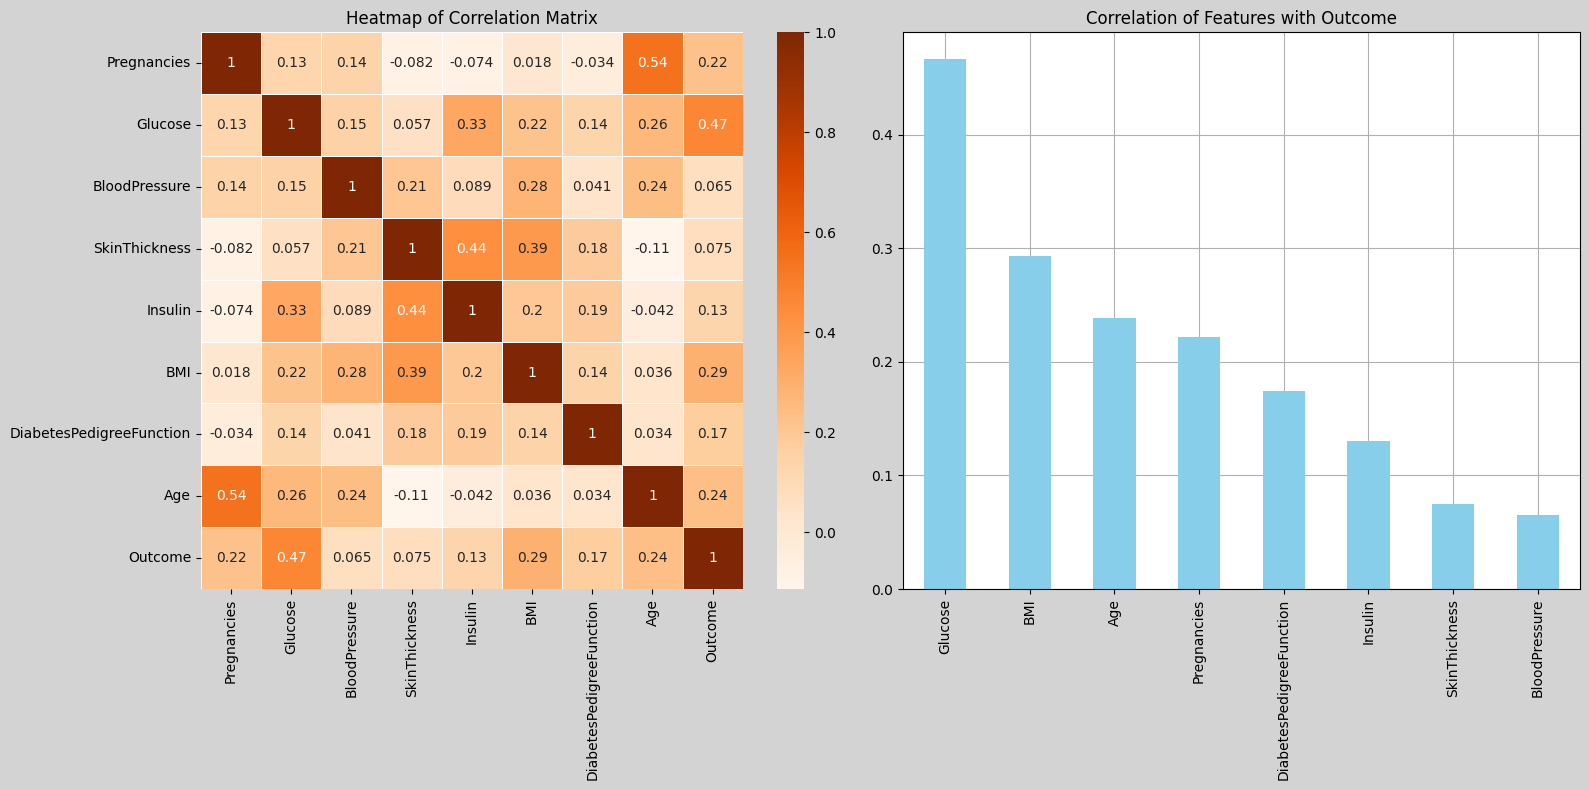

In [62]:
# Visualizing the correlation of features with heatmap
plt.figure(figsize=(16, 8), facecolor='lightgray')
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')

# Visualizing the correlation of features with barplot
plt.subplot(1, 2, 2)
corr_matrix['Outcome'].sort_values(ascending=False).drop('Outcome').plot(kind='bar', color='skyblue', zorder=2)
plt.title('Correlation of Features with Outcome')
plt.grid(True, zorder=1)

plt.tight_layout()
plt.show()

-> Since by checking the correlation of each feature by target variable, we can see that glucose has the highest correlation among all others while remaining features being low.

In [63]:
# Selecting the highly correlated features from among the set of features (Threshold: 0.2)
high_corr_features = corr_matrix.index[abs(corr_matrix['Outcome'] > 0.2)].tolist()
high_corr_features.remove('Outcome')
print("The highly correlated features:", high_corr_features)

The highly correlated features: ['Pregnancies', 'Glucose', 'BMI', 'Age']


-> So by correlation analysis, the features 'Pregnancies', 'Glucose', 'BMI' and 'Age' should be selected and the rest features should be discarded since they have very low relevance.

<h3><li>Mutual Information</li><h3>

In [64]:
# Separate the feature and target variable
X = diabetes_dataset.drop('Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Computing the mutual information
mutual_info = mutual_info_classif(X, Y)
mutual_info

array([0.05230812, 0.13246153, 0.        , 0.        , 0.03697509,
       0.0796602 , 0.0160122 , 0.06283392])

In [65]:
# Creating Dataframe of mutual information wrt target variable in sorted manner
mutual_info_dataframe = pd.DataFrame(mutual_info, index=X.columns, columns=['Mutual Information'])
mutual_info_dataframe = mutual_info_dataframe.sort_values(by='Mutual Information', ascending=False)
mutual_info_dataframe

,Mutual Information
Glucose,0.132462
BMI,0.079660
Age,0.062834
Pregnancies,0.052308
Insulin,0.036975
DiabetesPedigreeFunction,0.016012
SkinThickness,0.000000
BloodPressure,0.000000


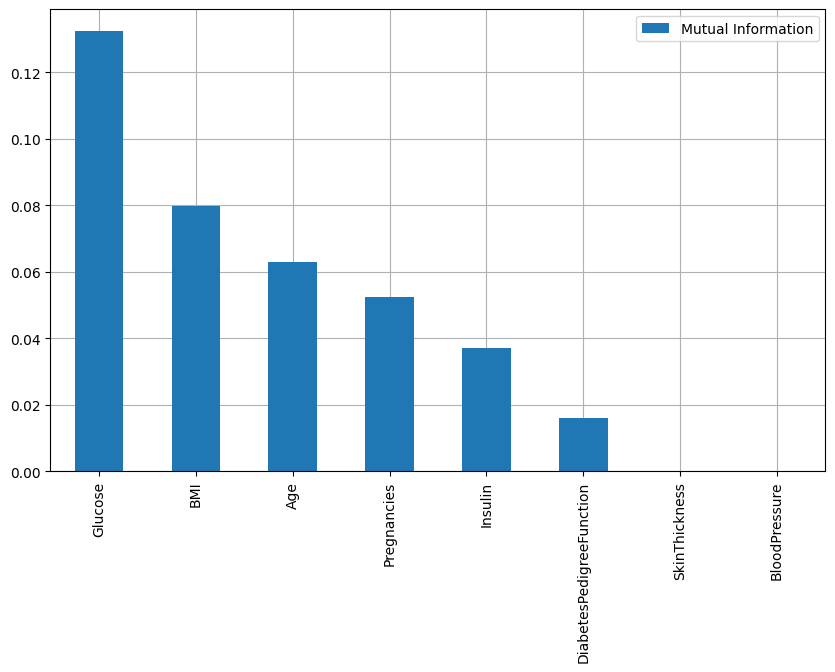

In [66]:
# Plotting the bar chart of sorted mutual informations
mutual_info_dataframe.sort_values(by='Mutual Information', ascending=False).plot.bar(figsize=(10, 6), zorder=2)
plt.grid(True, zorder=1)

-> Since by checking the mutual information of each feature by target variable, we can see that glucose has the highest information among all others while remaining features being low.

In [67]:
# Selecting the highly relevant features from among the set of features (Threshold: 0.03)
for column in mutual_info_dataframe.columns:
    high_mutualInfo_features = mutual_info_dataframe.index[abs(mutual_info_dataframe[column] > 0.03)].tolist()
    print("The highly relevant features by mutual information:", high_mutualInfo_features)

The highly relevant features by mutual information: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'Insulin']


-> So by mutual information, the features 'Pregnancies', 'Glucose', 'BMI', 'Age' and 'Insulin' should be selected and the rest features should be discarded since they have very low relevance.

<h3><li>Recursive Feature Elimination (RFE)</li><h3>

In [68]:
# Initializing the RFE
rfe = RFE(RandomForestClassifier(), n_features_to_select=4)

In [69]:
# Separate the feature and target variable
X = diabetes_dataset.drop('Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Fitting the RFE
rfe.fit(X, Y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=4)

In [70]:
# Creating a Dataframe for RFE results
rfe_dataframe = pd.DataFrame({'Feature': X.columns, 'Important': rfe.support_, 'Ranking': rfe.ranking_})
rfe_dataframe = rfe_dataframe.sort_values(by='Ranking')
rfe_dataframe

,Feature,Important,Ranking
1,Glucose,True,1
7,Age,True,1
6,DiabetesPedigreeFunction,True,1
5,BMI,True,1
2,BloodPressure,False,2
0,Pregnancies,False,3
4,Insulin,False,4
3,SkinThickness,False,5


-> So by RFE, the features 'Glucose', 'BMI', 'Age' and 'DiabetesPedigreeFunction' should be selected and the rest features should be discarded since they have very low ranking.

<h3>Conclusion</h3>

<p>--> Hence, the features good candidate to be selected are <b>'Glucose'</b>, <b>'BMI'</b>, <b>'Age'</b>, <b>'DiabetesPedigreeFunction'</b>, <b>'Insulin'</b> and <b>'Pregnancies'</b>.</p>

<hr>